# 01 - Data Understanding Notebook

## Objectives

In this stage, our primary objective is to grasp the patterns, trends, and characteristics within our dataset that directly impact effective inventory management. We aim to answer crucial questions such as:

- **What are typical daily sales levels, and how do extreme values impact stocking strategies?**
- **How are sales evolving over time, and what seasonal or periodic trends should we consider?**
- **How do external economic indicators, such as oil prices, correlate with sales performance?**
- **What are the monthly sales patterns, and how should inventory strategies adapt accordingly?**

Understanding "where the data is going" helps us make informed decisions about inventory replenishment, optimizing stock levels to prevent overstocking and understocking, thus enhancing operational efficiency.


## 1. Import and Load Data

In [2]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)

# Ingore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
sales_data = pd.read_csv('../data/train.csv')
stores_data = pd.read_csv('../data/stores.csv')
holidays_events_data = pd.read_csv('../data/holidays_events.csv')
oil_data = pd.read_csv('../data/oil.csv')
transactions_data = pd.read_csv('../data/transactions.csv')

## 2. Preview Datasets

In [27]:
from IPython.display import display

print("Sales Data:")
display(sales_data.head())
print("\nStores Data:")
display(stores_data.head())
print("\nHolidays and Events Data:")
display(holidays_events_data.head())
print("\nOil Price Data:")
display(oil_data.head())
print("\nTransactions Data:")
display(transactions_data.head())

Sales Data:


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0



Stores Data:


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4



Holidays and Events Data:


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False



Oil Price Data:


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20



Transactions Data:


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### Dataset Preview Commentary

- **Sales Data**  
    Provides granular daily sales records at the store and product category (family) level. Includes promotion indicators (`onpromotion`). Vital for identifying sales patterns directly related to stock levels and promotional impact.

- **Stores Data**  
    Contains essential details such as city, state, and store type. Helps in segmenting and clustering stores for tailored inventory strategies.

- **Holidays and Events Data**  
    Lists regional and local holidays and special events that can significantly influence sales fluctuations. Essential for anticipating and managing inventory peaks and dips.

- **Oil Price Data**  
    Reflects daily oil prices, a crucial economic indicator for Ecuador, potentially impacting consumer spending and indirectly affecting store sales and stocking decisions.

- **Transactions Data**  
    Captures daily customer traffic through the number of transactions. This provides context on store performance and assists in understanding sales volumes relative to footfall.


## 2.1 Data Health Check

As a best practice we "health check" our data. 

- Is there missing data? 
- Are there duplicates in the datasets?

In [30]:
print("\nMissing Values in Sales Data:")
print(sales_data.isnull().sum())
print("\nMissing Values in Oil Data:")
print(oil_data.isnull().sum())
print("\nMissing Values in Transactions Data:")
print(transactions_data.isnull().sum())
print("\nMissing Values in Holidays Events Data:")
print(holidays_events_data.isnull().sum())
print("\nMissing Values in Stores Data:")
print(stores_data.isnull().sum())

# Check for duplicates
print("\nDuplicates in Sales Data:")
print(sales_data.duplicated().sum())
print("\nDuplicates in Stores Data:")
print(stores_data.duplicated().sum())
print("\nDuplicates in Holidays Events Data:")
print(holidays_events_data.duplicated().sum())
print("\nDuplicates in Oil Data:")
print(oil_data.duplicated().sum())
print("\nDuplicates in Transactions Data:")
print


Missing Values in Sales Data:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing Values in Oil Data:
date           0
dcoilwtico    43
dtype: int64

Missing Values in Transactions Data:
date            0
store_nbr       0
transactions    0
dtype: int64

Missing Values in Holidays Events Data:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Missing Values in Stores Data:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Duplicates in Sales Data:
0

Duplicates in Stores Data:
0

Duplicates in Holidays Events Data:
0

Duplicates in Oil Data:
0

Duplicates in Transactions Data:


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

> Missing Data in `oil.csv`. So we check for gaps in the dates.

### 2.2 Missing dates in oil

In [5]:
# Check for missing dates in oil_data
oil_data['date'] = pd.to_datetime(oil_data['date'])
full_date_range = pd.date_range(start=oil_data['date'].min(), end=oil_data['date'].max())
missing_dates = full_date_range.difference(oil_data['date'])

print("Missing dates in oil_data:")
print(missing_dates)


Missing dates in oil_data:
DatetimeIndex(['2013-01-05', '2013-01-06', '2013-01-12', '2013-01-13',
               '2013-01-19', '2013-01-20', '2013-01-26', '2013-01-27',
               '2013-02-02', '2013-02-03',
               ...
               '2017-07-29', '2017-07-30', '2017-08-05', '2017-08-06',
               '2017-08-12', '2017-08-13', '2017-08-19', '2017-08-20',
               '2017-08-26', '2017-08-27'],
              dtype='datetime64[ns]', length=486, freq=None)


> The missing dates in the oil price data most likely occur on weekends when markets are closed. These gaps are expected and can be handled by forward-filling to maintain continuity in the analysis.

### 2.3 Merge Sales and Transactions 

In [6]:
# Ensure 'date' is datetime for both
sales_data['date'] = pd.to_datetime(sales_data['date'])
transactions_data['date'] = pd.to_datetime(transactions_data['date'])

# Merge on store and date
sales_traffic = pd.merge(
    sales_data,
    transactions_data,
    on=['store_nbr', 'date'],
    how='left'
)

> Merging sales and transactions matters because it connects what was sold with how many customers visited. This helps distinguish between low demand and missed sales opportunities, making inventory analysis more accurate and actionable.

## 3. Visualize Sales Traffic Distribution

A sales distribution plot helps us understand the overall shape and spread of sales values—identifying common sales levels, spotting outliers, and detecting skewness. This is crucial for selecting appropriate modeling techniques and scaling methods, especially when many products have low or zero sales.

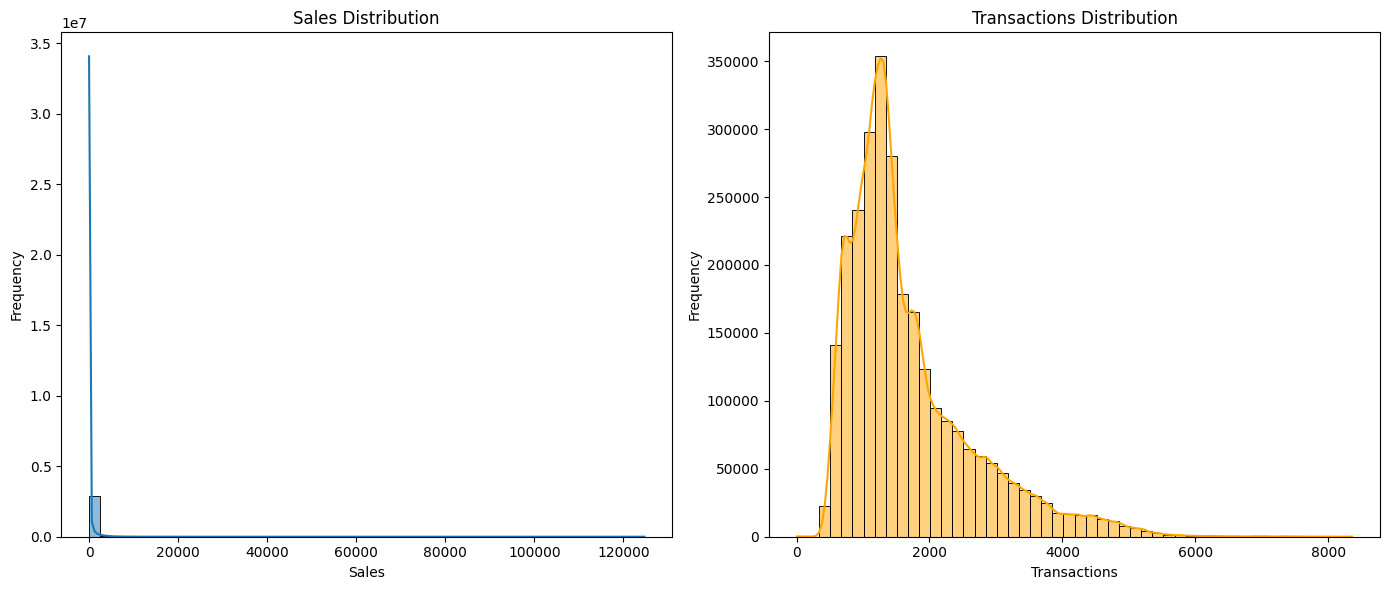

In [7]:
plt.figure(figsize=(14,6))

# Sales distribution
plt.subplot(1, 2, 1)
sns.histplot(sales_traffic['sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Transactions distribution
plt.subplot(1, 2, 2)
sns.histplot(sales_traffic['transactions'], bins=50, kde=True, color='orange')
plt.title('Transactions Distribution')
plt.xlabel('Transactions')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


> The mismatch in shapes suggests that low sales are not just due to low traffic. Since most stores see moderate transaction volume, many zero or low sales are likely due to low product demand or poor stock availability, not just lack of customers. This insight helps refine inventory and stocking decisions.

### 3.1 Analyze Proportion of Zero Sales alongside Transactions

Helps decide whether to treat zeros as real low demand or potential stockout problems.

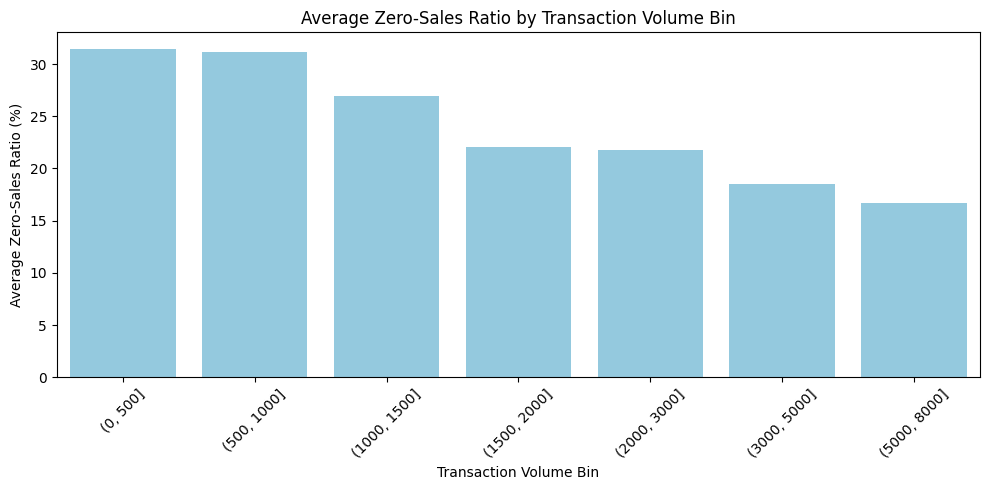

In [50]:
# Bin transaction volumes
bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 8000]
sales_traffic['transaction_bin'] = pd.cut(sales_traffic['transactions'], bins=bins)

# Calculate zero-sales ratio per bin
summary = (
	sales_traffic
	.groupby('transaction_bin')
	.apply(lambda df: (df['sales'] == 0).mean() * 100)
	.reset_index(name='zero_sales_ratio')
)

plt.figure(figsize=(10, 5))
sns.barplot(data=summary, x='transaction_bin', y='zero_sales_ratio', color='skyblue')
plt.title('Average Zero-Sales Ratio by Transaction Volume Bin')
plt.xlabel('Transaction Volume Bin')
plt.ylabel('Average Zero-Sales Ratio (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Zero sales remain high even with strong customer traffic, suggesting issues like stockouts or poor product availability—not just low demand.

### 3.1.1. Breakdown by product categories (`family`)
See if some product categories are always zero (may not be stocked or rarely needed).

                        family  zero_sales_count  avg_transactions  \
4                        BOOKS             88167       1667.642761   
1                    BABY CARE             85599       1706.832429   
31  SCHOOL AND OFFICE SUPPLIES             67368       1520.111726   
17             HOME APPLIANCES             66854       1489.244163   
19                  LADIESWEAR             54422       1493.314851   
23                   MAGAZINES             51414       1554.584771   
26                PET SUPPLIES             49665       1544.110975   
14                    HARDWARE             43524       1449.024193   
20             LAWN AND GARDEN             42544       1157.983307   
27     PLAYERS AND ELECTRONICS             40818       1667.592568   

    total_records  zero_sales_ratio  
4           90936         96.955001  
1           90936         94.131037  
31          90936         74.082871  
17          90936         73.517639  
19          90936         59.846485  
2

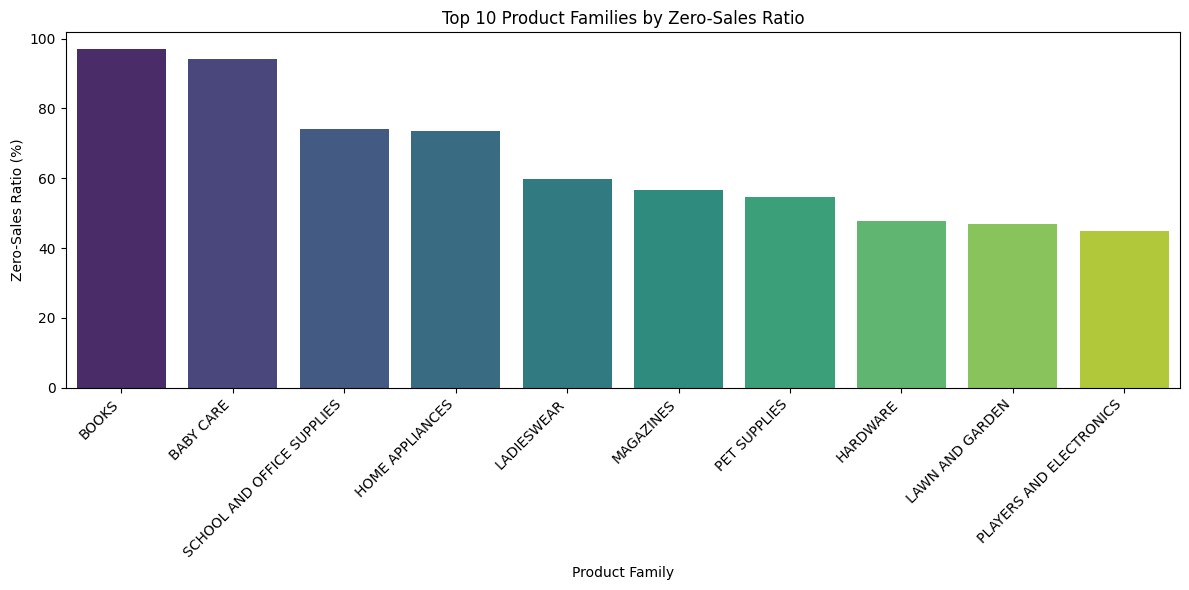

In [38]:
# Filter zero-sales records
zero_sales_df = sales_traffic[sales_traffic['sales'] == 0]

# Group by family: count zero sales and calculate average transactions
zero_sales_by_family = zero_sales_df.groupby('family').agg(
    zero_sales_count=('sales', 'count'),
    avg_transactions=('transactions', 'mean')
).reset_index()

# Add total record count for each family
total_by_family = sales_traffic.groupby('family')['sales'].count().reset_index()
total_by_family = total_by_family.rename(columns={'sales': 'total_records'})

# Merge and compute zero-sales ratio
result = pd.merge(zero_sales_by_family, total_by_family, on='family')
result['zero_sales_ratio'] = result['zero_sales_count'] / result['total_records'] * 100

# Sort by zero-sales ratio descending
result_sorted = result.sort_values(by='zero_sales_ratio', ascending=False)

# Show top 10
print(result_sorted.head(10))

# Plot top 10 families by zero-sales ratio
plt.figure(figsize=(12, 6))
sns.barplot(
    data=result_sorted.head(10),
    x='family',
    y='zero_sales_ratio',
    palette='viridis'
)
plt.title('Top 10 Product Families by Zero-Sales Ratio')
plt.ylabel('Zero-Sales Ratio (%)')
plt.xlabel('Product Family')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> Product categories like Books and Baby Care show high zero-sales despite strong store traffic, suggesting they're likely unnecessary or not stocked in many stores. This highlights candidates for inventory reduction.

### 3.1.2. Breakdown by `store_nbr`
Identify underperforming stores or data entry inconsistencies.

    store_nbr  zero_sales_count  avg_transactions  total_records  \
51         52             51982       2288.756579          55572   
21         22             38094        744.122112          55572   
41         42             34575       1103.298121          55572   
20         21             34066       1094.098518          55572   
28         29             31797       1109.874292          55572   
19         20             30271       1572.649001          55572   
52         53             24028        935.591770          55572   
31         32             21995        636.537604          55572   
34         35             21738        659.326569          55572   
53         54             19310        866.758110          55572   

    zero_sales_ratio  
51         93.539912  
21         68.548910  
41         62.216584  
20         61.300655  
28         57.217664  
19         54.471676  
52         43.237602  
31         39.579285  
34         39.116821  
53         34.747715 

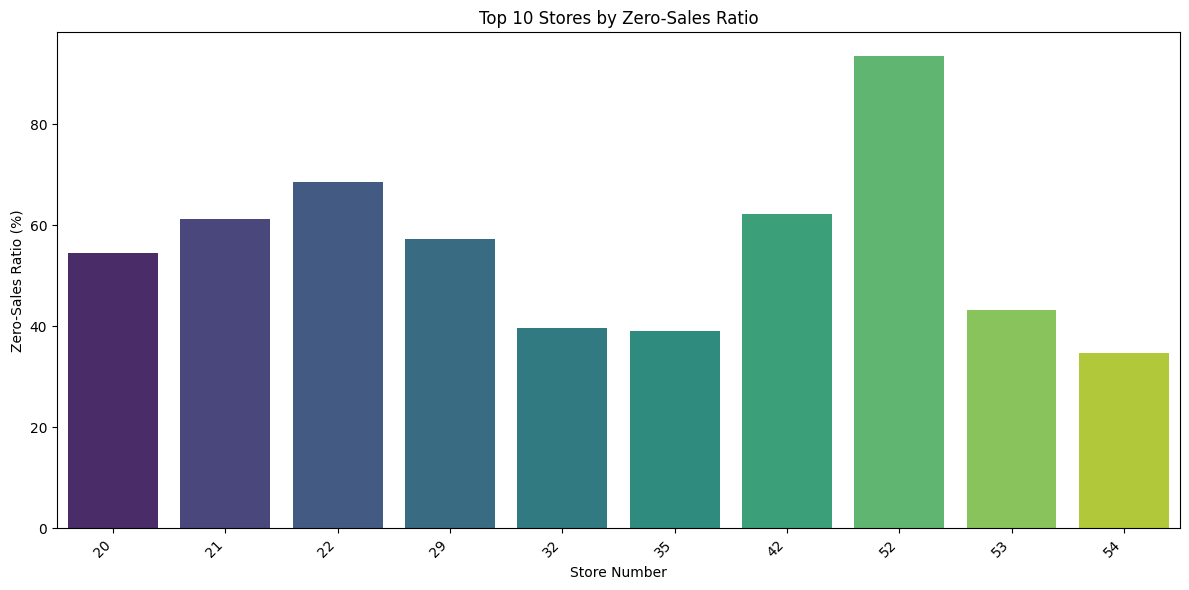

In [39]:
# Filter zero sales
zero_sales_df = sales_traffic[sales_traffic['sales'] == 0]

# Group by store: count zero sales and average transactions
zero_sales_by_store = zero_sales_df.groupby('store_nbr').agg(
    zero_sales_count=('sales', 'count'),
    avg_transactions=('transactions', 'mean')
).reset_index()

# Add total records per store
total_by_store = sales_traffic.groupby('store_nbr')['sales'].count().reset_index()
total_by_store = total_by_store.rename(columns={'sales': 'total_records'})

# Merge and compute zero-sales ratio
result = pd.merge(zero_sales_by_store, total_by_store, on='store_nbr')
result['zero_sales_ratio'] = result['zero_sales_count'] / result['total_records'] * 100

# Sort by zero-sales ratio
result_sorted = result.sort_values(by='zero_sales_ratio', ascending=False)

# Show top 10
print(result_sorted.head(10))

# Plot top 10 stores by zero-sales ratio
plt.figure(figsize=(12, 6))
sns.barplot(
    data=result_sorted.head(10),
    x='store_nbr',
    y='zero_sales_ratio',
    palette='viridis'
)
plt.title('Top 10 Stores by Zero-Sales Ratio')
plt.ylabel('Zero-Sales Ratio (%)')
plt.xlabel('Store Number')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> Stores with high zero-sales ratios and decent transactions may have stocking or data issues. Those with both high zero sales and low transactions are likely underperforming. This helps target problem stores for review.

### 3.1.3. Check if zeros align with `onpromotion == 1`
If a product is being promoted but still has zero sales, that could indicate supply issues.

Zero sales with transactions while on promotion: 6
Proportion of promoted records affected: 0.00%


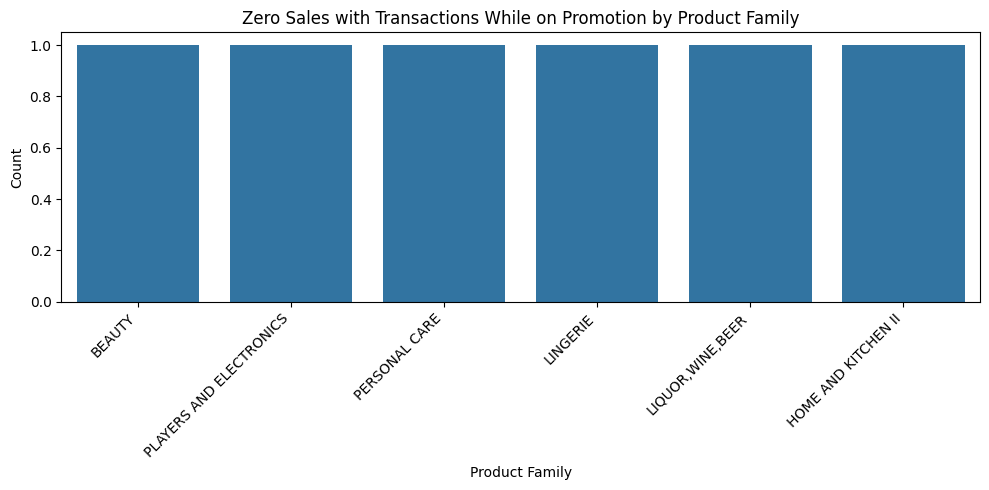

In [40]:
# Filter: zero sales, some customer traffic, and promotion active
zero_sales_promo = sales_traffic[
    (sales_traffic['sales'] == 0) &
    (sales_traffic['transactions'] > 0) &
    (sales_traffic['onpromotion'] == 1)
]

# Count and display
count = zero_sales_promo.shape[0]
total_promoted = sales_traffic[sales_traffic['onpromotion'] == 1].shape[0]

proportion = (count / total_promoted) * 100
print(f"Zero sales with transactions while on promotion: {count}")
print(f"Proportion of promoted records affected: {proportion:.2f}%")

# Visualize: Bar plot of zero-sales-on-promotion by product family
plt.figure(figsize=(10, 5))
sns.countplot(data=zero_sales_promo, x='family', order=zero_sales_promo['family'].value_counts().index)
plt.title('Zero Sales with Transactions While on Promotion by Product Family')
plt.xlabel('Product Family')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> Only 6 promoted items had zero sales out of 174,551 — just 0.00%. This suggests promotions are effectively supported by stock, with no major supply issues.

### 3.1.4. Zero sales over time

Flags suspicious days where products may have run out despite customer traffic and holidays.

Days with potential stockouts near holidays:
          date  zero_sales_ratio  total_transactions
0   2013-01-01         99.046016             25410.0
4   2013-01-05         50.785634           3087909.0
11  2013-01-12         51.010101           2821863.0
41  2013-02-11         52.300786           2218326.0
42  2013-02-12         51.739618           2369664.0
60  2013-03-02         50.392817           3254328.0
90  2013-04-01         50.224467           2695374.0
101 2013-04-12         49.775533           2488299.0
103 2013-04-14         51.402918           2864499.0
110 2013-04-21         51.571268           2884233.0


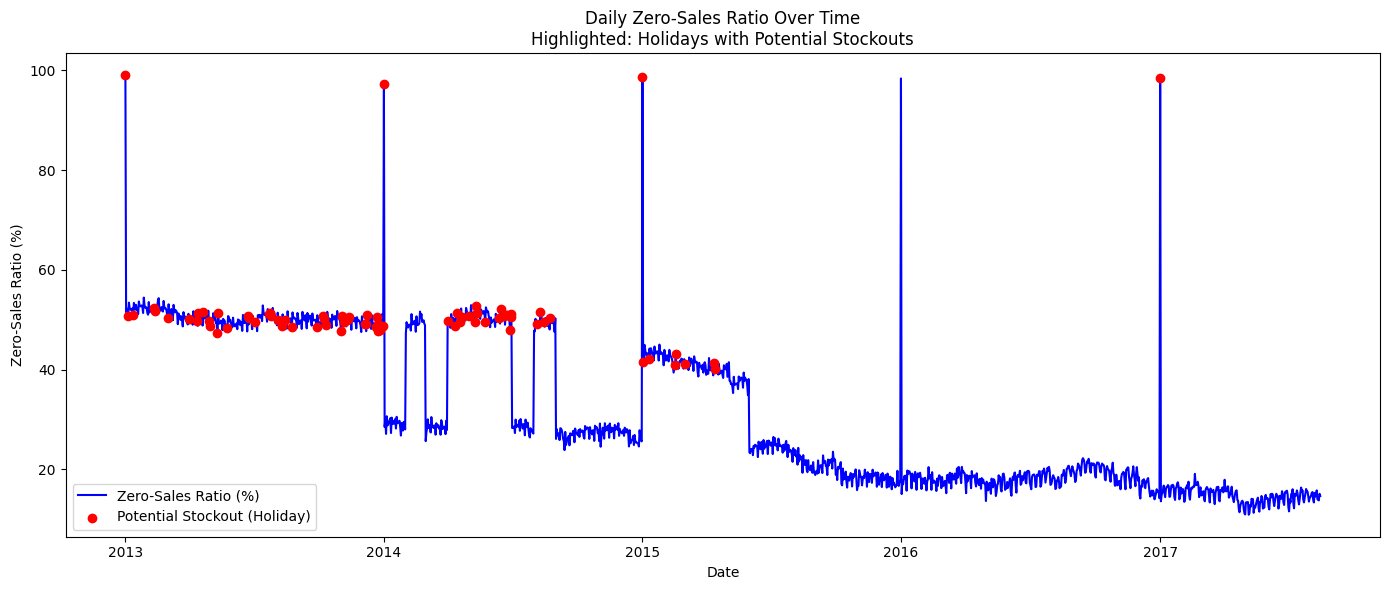

In [41]:
# Ensure dates are in datetime format
sales_traffic['date'] = pd.to_datetime(sales_traffic['date'])
holidays_events_data['date'] = pd.to_datetime(holidays_events_data['date'])

# Mark holiday days
holiday_dates = holidays_events_data['date'].unique()
sales_traffic['is_holiday'] = sales_traffic['date'].isin(holiday_dates)

# Group by date: sum zero sales, total records, transactions
daily_summary = sales_traffic.groupby('date').agg(
    zero_sales=('sales', lambda x: (x == 0).sum()),
    total_records=('sales', 'count'),
    total_transactions=('transactions', 'sum'),
    is_holiday=('is_holiday', 'first')
).reset_index()

# Add zero-sales ratio
daily_summary['zero_sales_ratio'] = daily_summary['zero_sales'] / daily_summary['total_records'] * 100

# Optional: Filter high zero-sales with customer traffic (e.g. over 40% ratio and transactions > 1000)
potential_issues = daily_summary[
    (daily_summary['zero_sales_ratio'] > 40) &
    (daily_summary['total_transactions'] > 1000)
]

# Check if they align with holidays
holiday_issues = potential_issues[potential_issues['is_holiday'] == True]

print("Days with potential stockouts near holidays:")
print(holiday_issues[['date', 'zero_sales_ratio', 'total_transactions']].head(10))

# Visualize zero-sales ratio over time, highlighting holidays with potential stockouts
plt.figure(figsize=(14, 6))
plt.plot(daily_summary['date'], daily_summary['zero_sales_ratio'], label='Zero-Sales Ratio (%)', color='blue')
plt.scatter(
    holiday_issues['date'],
    holiday_issues['zero_sales_ratio'],
    color='red',
    label='Potential Stockout (Holiday)',
    zorder=5
)
plt.title('Daily Zero-Sales Ratio Over Time\nHighlighted: Holidays with Potential Stockouts')
plt.xlabel('Date')
plt.ylabel('Zero-Sales Ratio (%)')
plt.legend()
plt.tight_layout()
plt.show()



> Several holiday periods, like January 1st and early April, show high zero-sales ratios despite strong customer traffic. This suggests possible stockouts or poor inventory alignment during high-demand days. These findings highlight the need for improved inventory planning around holidays to avoid missed sales opportunities. 

> 4 days full store closure -> Christmas 

###

### 3.2 Analyze Log-Transformed Sales Distribution

Shows if the skew is due to a few extreme values or systemic.

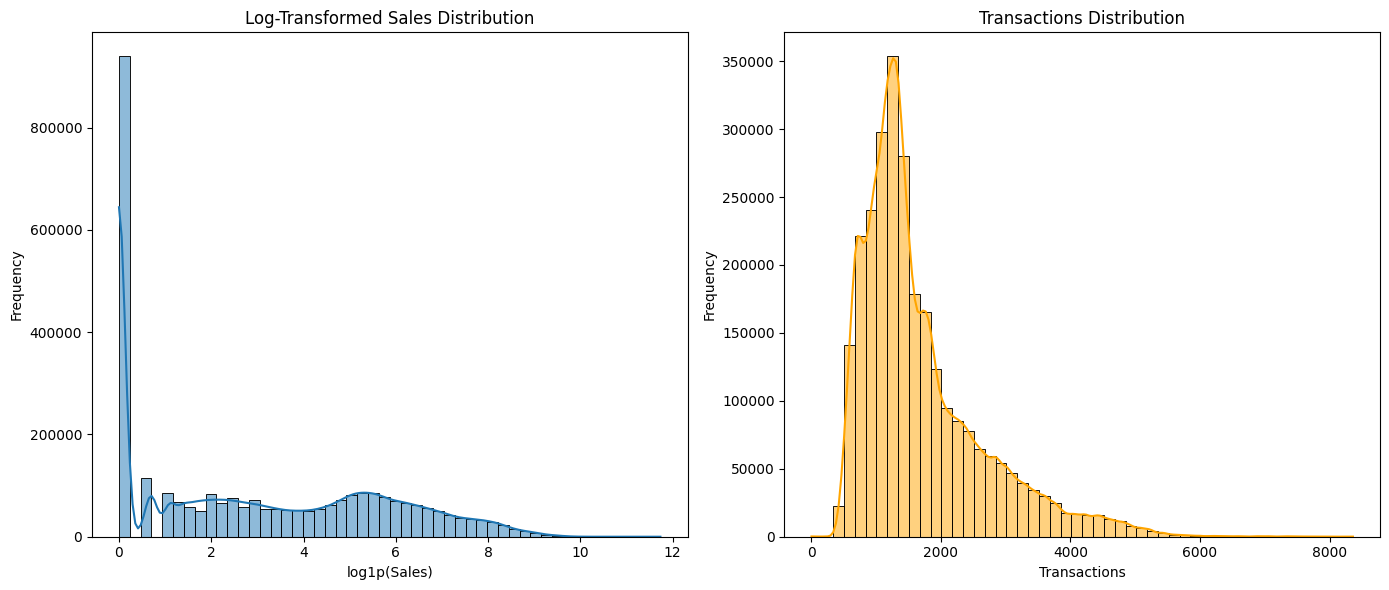

In [13]:
# Apply log1p to sales to handle zero values
sales_traffic['log_sales'] = np.log1p(sales_traffic['sales'])

# Plot distribution of log-transformed sales
plt.figure(figsize=(14, 6))

# Log-transformed sales distribution
plt.subplot(1, 2, 1)
sns.histplot(sales_traffic['log_sales'], bins=50, kde=True)
plt.title('Log-Transformed Sales Distribution')
plt.xlabel('log1p(Sales)')
plt.ylabel('Frequency')

# Transactions distribution for comparison
plt.subplot(1, 2, 2)
sns.histplot(sales_traffic['transactions'], bins=50, kde=True, color='orange')
plt.title('Transactions Distribution')
plt.xlabel('Transactions')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

> The log-transformed sales remain skewed, showing that low sales are a widespread pattern—not just outliers. Since transactions are normally distributed, the issue likely lies in product demand or stock availability, not foot traffic.

### 3.2 Analyze Top vs. Bottom Product Families / Stores

Supports inventory decisions: which items are core vs. expendable.

Top Product Families:
           family         sales
12      GROCERY I  3.434627e+08
3       BEVERAGES  2.169545e+08
30        PRODUCE  1.227047e+08
7        CLEANING  9.752129e+07
8           DAIRY  6.448771e+07
5    BREAD/BAKERY  4.213395e+07
28        POULTRY  3.187600e+07
24          MEATS  3.108647e+07
25  PERSONAL CARE  2.459205e+07
9            DELI  2.411032e+07

Bottom Product Families:
                        family     sales
4                        BOOKS    6438.0
1                    BABY CARE   10051.0
17             HOME APPLIANCES   41601.0
14                    HARDWARE  103470.0
23                   MAGAZINES  266359.0
31  SCHOOL AND OFFICE SUPPLIES  269316.0
2                       BEAUTY  337893.0
26                PET SUPPLIES  356584.0
20             LAWN AND GARDEN  548842.0
0                   AUTOMOTIVE  554822.0


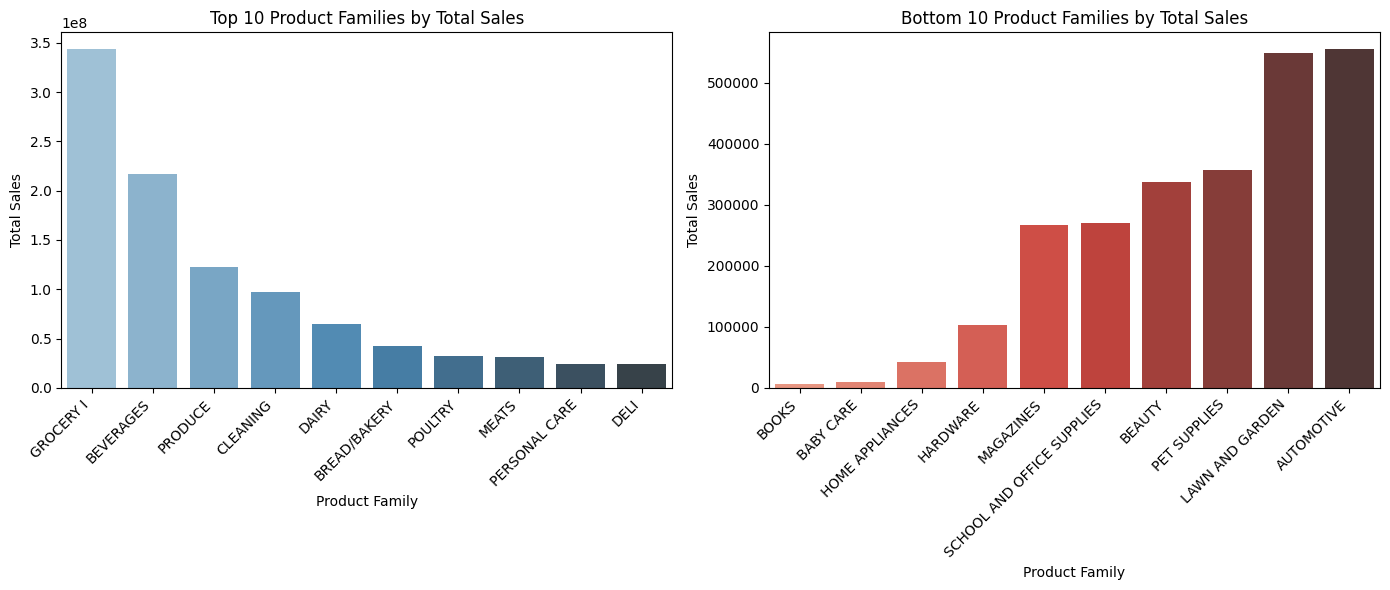

Top Performing Stores:
    store_nbr         sales
43         44  6.208755e+07
44         45  5.449801e+07
46         47  5.094831e+07
2           3  5.048191e+07
48         49  4.342010e+07
45         46  4.189606e+07
47         48  3.593313e+07
50         51  3.291149e+07
7           8  3.049429e+07
49         50  2.865302e+07

Bottom Performing Stores:
    store_nbr         sales
51         52  2.696170e+06
21         22  4.090202e+06
31         32  5.951796e+06
29         30  7.382074e+06
34         35  7.676679e+06
25         26  7.755122e+06
41         42  8.945768e+06
20         21  9.255506e+06
9          10  9.613906e+06
28         29  9.725158e+06


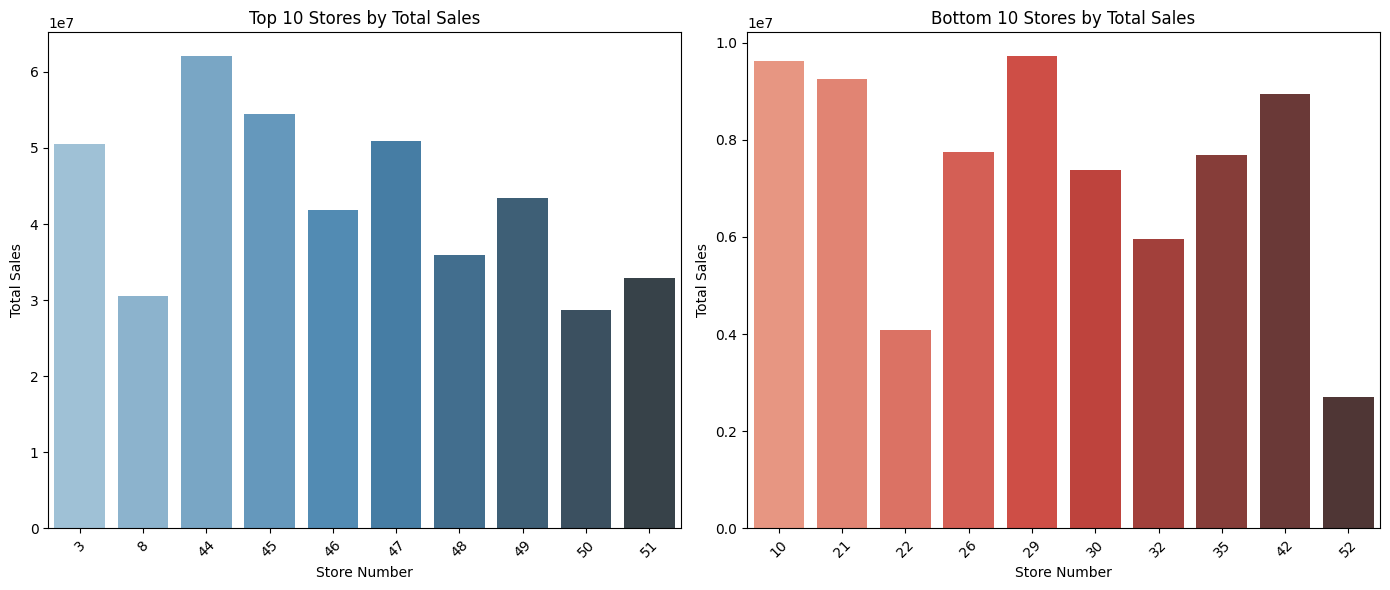

In [43]:
# Total sales by product family
family_sales = sales_traffic.groupby('family')['sales'].sum().reset_index()

# Sort and display top 10 and bottom 10
top_families = family_sales.sort_values(by='sales', ascending=False).head(10)
bottom_families = family_sales.sort_values(by='sales', ascending=True).head(10)

print("Top Product Families:")
print(top_families)

print("\nBottom Product Families:")
print(bottom_families)

# Visualize top and bottom product families
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=top_families, x='family', y='sales', palette='Blues_d')
plt.title('Top 10 Product Families by Total Sales')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(data=bottom_families, x='family', y='sales', palette='Reds_d')
plt.title('Bottom 10 Product Families by Total Sales')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Total sales by store
store_sales = sales_traffic.groupby('store_nbr')['sales'].sum().reset_index()

# Sort and display top 10 and bottom 10
top_stores = store_sales.sort_values(by='sales', ascending=False).head(10)
bottom_stores = store_sales.sort_values(by='sales', ascending=True).head(10)

print("Top Performing Stores:")
print(top_stores)

print("\nBottom Performing Stores:")
print(bottom_stores)

# Visualize top and bottom stores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=top_stores, x='store_nbr', y='sales', palette='Blues_d')
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=bottom_stores, x='store_nbr', y='sales', palette='Reds_d')
plt.title('Bottom 10 Stores by Total Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Top product families** like **GROCERY I**, **BEVERAGES**, and **PRODUCE** dominate total sales and should be prioritized as core inventory. In contrast, low-performing categories like **BOOKS** and **BABY CARE** generate negligible revenue and may be candidates for de-stocking or reassignment.

Store-level sales also vary greatly — **Store 44** leads with over 62 million in sales, while **Store 52** has under 3 million. This supports tailoring inventory strategies per store, focusing resources on high-performing locations and auditing or scaling back in underperforming ones.

## 4. Analyze sales over time

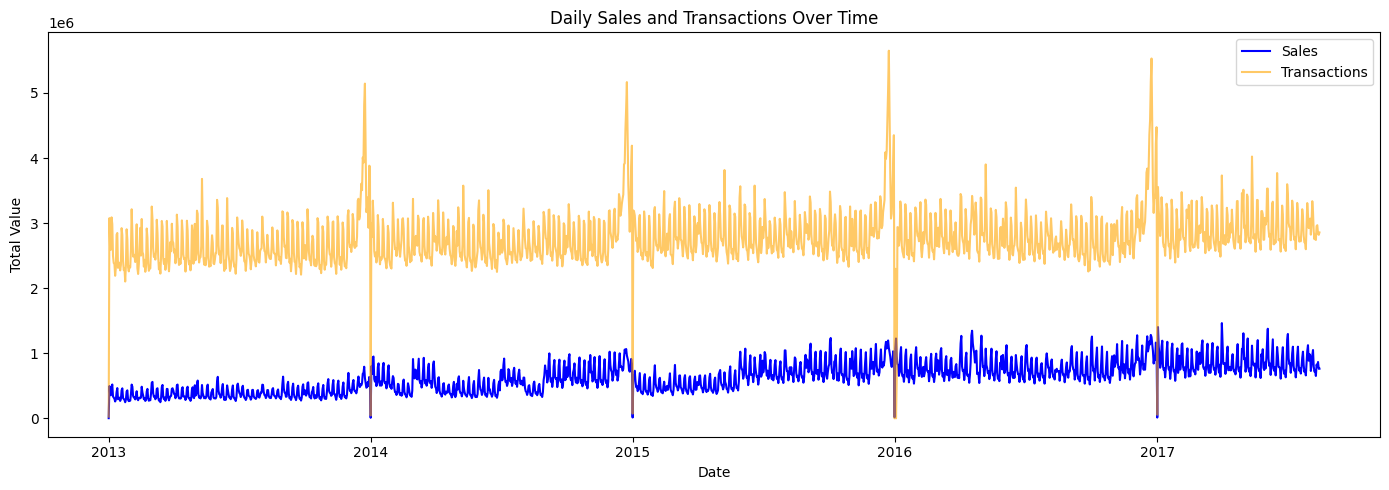

In [16]:
# Group total daily sales and transactions
daily_trend = sales_traffic.groupby('date').agg({
    'sales': 'sum',
    'transactions': 'sum'
}).reset_index()

# Plot sales and transactions over time
plt.figure(figsize=(14, 5))
plt.plot(daily_trend['date'], daily_trend['sales'], label='Sales', color='blue')
plt.plot(daily_trend['date'], daily_trend['transactions'], label='Transactions', color='orange', alpha=0.6)
plt.title('Daily Sales and Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend()
plt.tight_layout()
plt.show()

> Sales and transactions rise together over time, showing a clear seasonal pattern. However, transactions are consistently higher, suggesting potential to improve conversion by optimizing stock or promotions.

> Product families like Books and Baby Care have extremely low sales per transaction, indicating poor performance despite high traffic. They may not justify shelf space and should be reconsidered in the inventory strategy.


### 4.1 Rolling averages / trends
Capture short-term momentum (7 and 14 days rolling mean of sales) to smooth volatility and improve forecasts.

            date  store_nbr      family  sales  rolling_avg_7  rolling_avg_14
0     2013-01-01          1  AUTOMOTIVE    0.0       0.000000        0.000000
1782  2013-01-02          1  AUTOMOTIVE    2.0       1.000000        1.000000
3564  2013-01-03          1  AUTOMOTIVE    3.0       1.666667        1.666667
5346  2013-01-04          1  AUTOMOTIVE    3.0       2.000000        2.000000
7128  2013-01-05          1  AUTOMOTIVE    5.0       2.600000        2.600000
8910  2013-01-06          1  AUTOMOTIVE    2.0       2.500000        2.500000
10692 2013-01-07          1  AUTOMOTIVE    0.0       2.142857        2.142857
12474 2013-01-08          1  AUTOMOTIVE    2.0       2.428571        2.125000
14256 2013-01-09          1  AUTOMOTIVE    2.0       2.428571        2.111111
16038 2013-01-10          1  AUTOMOTIVE    2.0       2.285714        2.100000


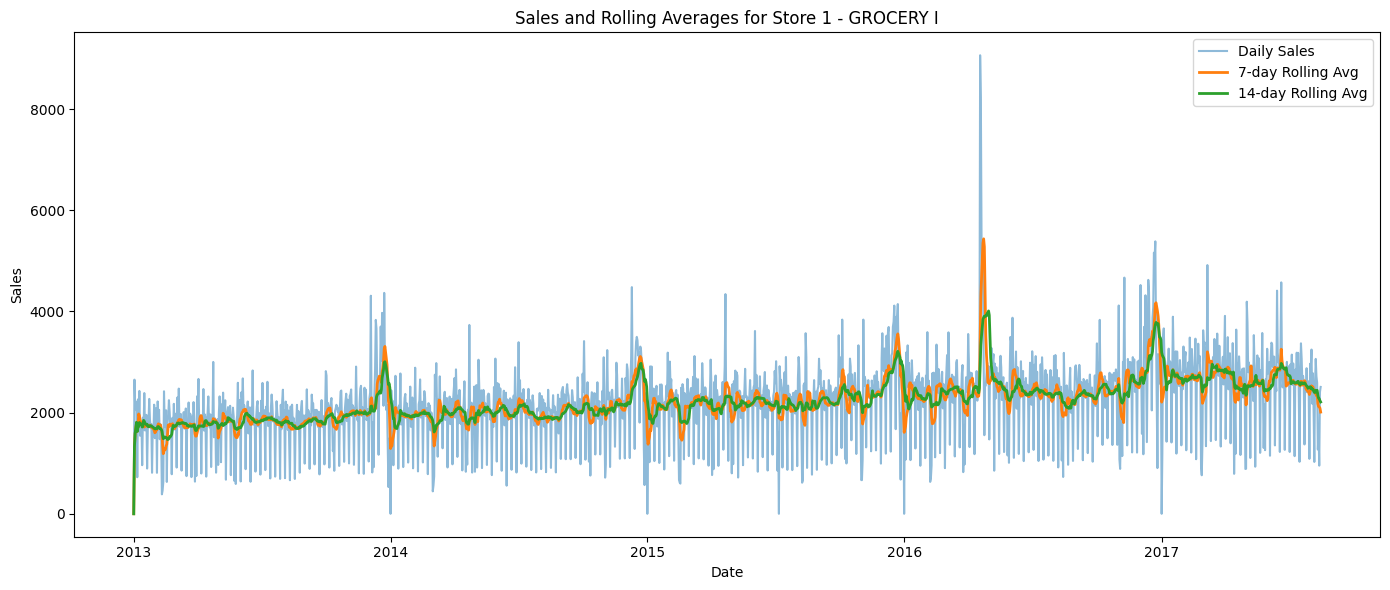

In [47]:
# Ensure data is sorted
sales_rolling = sales_traffic.sort_values(by=['store_nbr', 'family', 'date'])

# Compute 7-day and 14-day rolling averages per store-family
sales_rolling['rolling_avg_7'] = (
    sales_rolling.groupby(['store_nbr', 'family'])['sales']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

sales_rolling['rolling_avg_14'] = (
    sales_rolling.groupby(['store_nbr', 'family'])['sales']
    .transform(lambda x: x.rolling(window=14, min_periods=1).mean())
)

# Preview result
print(sales_rolling[['date', 'store_nbr', 'family', 'sales', 'rolling_avg_7', 'rolling_avg_14']].head(10))

# Visualize rolling averages for a sample store-family
sample = sales_rolling[(sales_rolling['store_nbr'] == 1) & (sales_rolling['family'] == 'GROCERY I')]

plt.figure(figsize=(14, 6))
plt.plot(sample['date'], sample['sales'], label='Daily Sales', alpha=0.5)
plt.plot(sample['date'], sample['rolling_avg_7'], label='7-day Rolling Avg', linewidth=2)
plt.plot(sample['date'], sample['rolling_avg_14'], label='14-day Rolling Avg', linewidth=2)
plt.title('Sales and Rolling Averages for Store 1 - GROCERY I')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


> The plot shows clear seasonality with sharp sales spikes. Rolling averages highlight steady growth and help smooth out noise. This supports smarter short-term stocking decisions for GROCERY I at Store 1.

## 5. Promotions Impact Analysis
Helps identify which promotions are effective and which are wasteful.

<Figure size 1400x600 with 0 Axes>

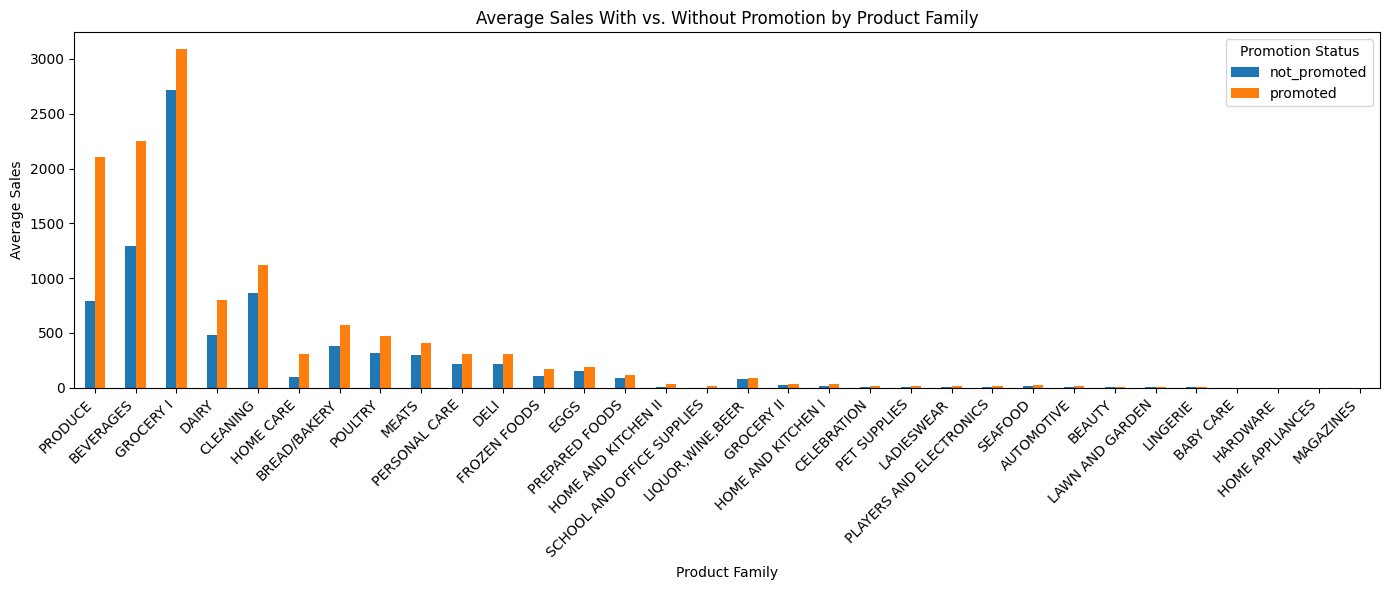

In [18]:
# Group and pivot
promo_impact = sales_traffic.groupby(['family', 'onpromotion'])['sales'].mean().unstack()

# Only keep columns for onpromotion == 0 and onpromotion == 1 if they exist
cols = []
if 0 in promo_impact.columns:
	cols.append(0)
if 1 in promo_impact.columns:
	cols.append(1)
promo_impact = promo_impact[cols]

# Rename columns for clarity
col_map = {}
if 0 in promo_impact.columns:
	col_map[0] = 'not_promoted'
if 1 in promo_impact.columns:
	col_map[1] = 'promoted'
promo_impact = promo_impact.rename(columns=col_map)

# Drop families with missing promotion data
promo_impact = promo_impact.dropna()

# Calculate lift
promo_impact['promo_lift'] = promo_impact['promoted'] - promo_impact['not_promoted']
promo_impact = promo_impact.sort_values(by='promo_lift', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
promo_impact[['not_promoted', 'promoted']].plot(kind='bar', stacked=False, figsize=(14, 6))
plt.title('Average Sales With vs. Without Promotion by Product Family')
plt.ylabel('Average Sales')
plt.xlabel('Product Family')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Promotion Status')
plt.show()


> The bar plot shows that promotions significantly boost sales in major categories like DAIRY, GROCERY I, and PRODUCE, confirming their value in promotional planning. Meanwhile, categories on the far right (e.g., Magazines, Home Appliances, Baby Care) see little to no gain, suggesting promotions there may be ineffective or unnecessary.

This visualization helps prioritize promotional resources toward high-impact categories.

## 6. Store Clustering Based on Performance

Group similar stores to apply tailored stocking strategies (e.g. high-traffic urban vs. low-traffic rural).

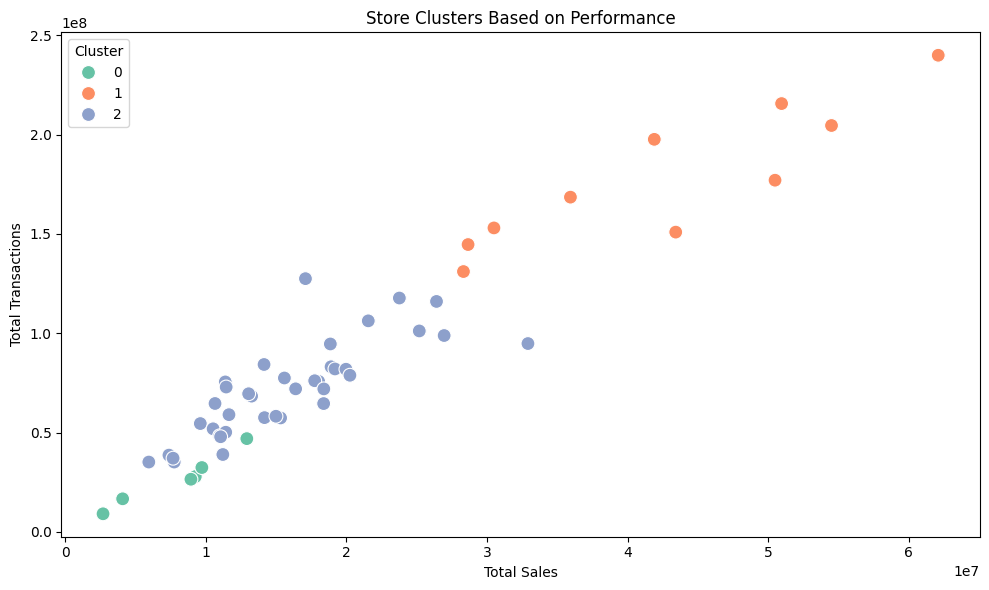

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Aggregate store-level performance metrics
store_perf = sales_traffic.copy()
store_perf['zero_sales'] = (store_perf['sales'] == 0).astype(int)

performance_summary = store_perf.groupby('store_nbr').agg(
    total_sales=('sales', 'sum'),
    total_transactions=('transactions', 'sum'),
    zero_sales_ratio=('zero_sales', 'mean')
).reset_index()

# Merge with store metadata
store_summary = performance_summary.merge(stores_data, on='store_nbr')

# Normalize numeric features for clustering
features = store_summary[['total_sales', 'total_transactions', 'zero_sales_ratio']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
store_summary['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize store clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=store_summary,
    x='total_sales',
    y='total_transactions',
    hue='cluster',
    palette='Set2',
    s=100
)
plt.title('Store Clusters Based on Performance')
plt.xlabel('Total Sales')
plt.ylabel('Total Transactions')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


> The plot shows three distinct store groups: high performers, average performers, and underperformers. This helps tailor inventory and operational strategies based on store performance levels.

## 6.1 Store Cluster Summary Table

In [22]:
# Generate summary statistics per cluster
cluster_summary = store_summary.groupby('cluster').agg(
    store_count=('store_nbr', 'count'),
    avg_total_sales=('total_sales', 'mean'),
    avg_total_transactions=('total_transactions', 'mean'),
    avg_zero_sales_ratio=('zero_sales_ratio', 'mean')
).reset_index()

# Display
print(cluster_summary)


   cluster  store_count  avg_total_sales  avg_total_transactions  \
0        0            6     7.938960e+06            2.655990e+07   
1        1           10     4.267379e+07            1.783428e+08   
2        2           38     1.577035e+07            7.173731e+07   

   avg_zero_sales_ratio  
0              0.662159  
1              0.199079  
2              0.287779  


> Cluster 0 stores underperform with low sales and high zero-sales rates. Cluster 1 stores are top performers with strong sales and efficiency. Cluster 2 stores are moderate and stable, offering room for optimization.

## 7. Summary of Key Findings

 - **Zero sales affect 31% of records**  
    This high proportion, especially concentrated in certain products and stores, suggests that stockouts—not low demand—are widespread. Identifying and addressing these patterns is essential to reduce missed sales and improve customer satisfaction.

- **High transactions with no sales during holidays**  
    When stores are busy but items don't sell, it's a red flag. It implies demand was present, but products were unavailable—a clear sign of inventory planning failure. These moments often represent the highest sales potential, making the losses more costly.

 - **Promotions are effective, but only when stock is available**  
    Promotional campaigns succeed in driving sales—but only if the item is actually in stock. Your data showed that promoted items rarely have zero sales, reinforcing that stock availability is the limiting factor, not marketing. Fixing this aligns operations with marketing efforts and maximizes ROI.
